# Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## Simple Linear Regression
Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

The linear function can be represented as:
**y = mx + c**

Where:
- y is the response
- x is the feature
- m is the slope
- c is the intercept
- m and c are the coefficients of the model

The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

## Multiple Linear Regression
Multiple linear regression is an extension of simple linear regression as it takes more than one feature to predict the response. The linear function can be represented as:
**y = m₁x₁ + m₂x₂ + m₃x₃ + ... + c**

Where:
- y is the response
- x₁, x₂, x₃, ... are the features
- m₁, m₂, m₃, ... are the coefficients of the model
- c is the intercept

The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m₁, m₂, m₃, ... and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [4]:
# import the tips dataset
df =sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


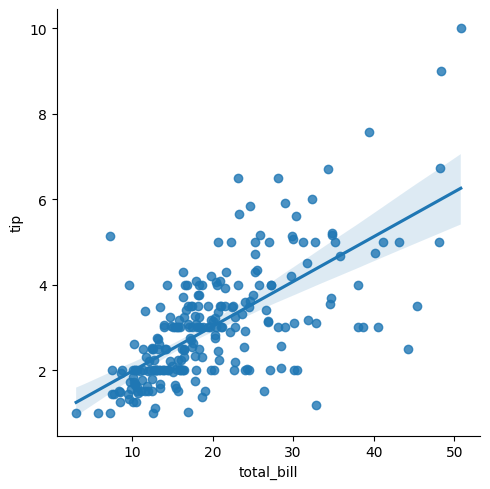

In [5]:
sns.lmplot(x='total_bill', y='tip', data=df)

### Standard Scaler

The Standard Scaler is a preprocessing technique used to standardize the features of a dataset by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1. Standardization is important for many machine learning algorithms as it ensures that all features contribute equally to the result and improves the convergence speed of gradient-based algorithms.

In [6]:
# proccess the data using stander scaler
scalar = StandardScaler()
df[['total_bill', 'tip']] = scalar.fit_transform(df[['total_bill', 'tip']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


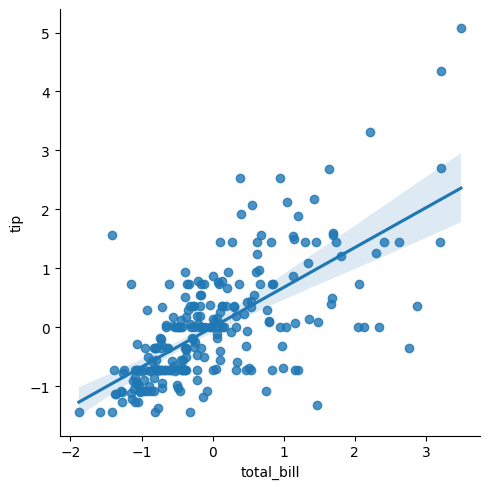

In [7]:
sns.lmplot(x='total_bill', y='tip', data=df)

In [8]:
# separate the features X and the target/labels y
X = df[['total_bill']]
y = df['tip']

In [9]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [10]:
# call the model
model = LinearRegression()

In [11]:
%%time
# train the model
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 4.76 ms


LinearRegression()

In [14]:
model.predict([[44]])

c:\Users\dell\miniconda3\envs\MAchine_learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.31266648])

In [ ]:
# prediction
y_pred = model.predict(X_test)

In [16]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
# root mean squared error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.2983382530785567
R2:  0.5449381659234667
MAPE:  7.369211703304975
MAE:  0.4496364577054319
RMSE:  0.5462034905404365


### Model Evaluation Metrics Explained

- **MSE (Mean Squared Error):**  
    Measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. Lower values indicate better model performance.

- **R2 (R-squared Score):**  
    Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Ranges from 0 to 1; higher values mean a better fit.

- **MAPE (Mean Absolute Percentage Error):**  
    Calculates the average absolute percentage difference between actual and predicted values. Expressed as a percentage, lower values indicate more accurate predictions.

- **MAE (Mean Absolute Error):**  
    Measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values mean better accuracy.

- **RMSE (Root Mean Squared Error):**  
    The square root of the mean squared error. It is in the same units as the target variable and penalizes larger errors more than MAE. Lower values indicate better model performance.

## Save and load a trained Machine Learning model
After training a machine learning model, it is important to save the model to a file. This is because training a machine learning model can be computationally expensive and time-consuming. Saving the model to a file allows us to use the trained model in the future without having to retrain it. In this notebook, we will see how to save and load a trained machine learning model using the pickle library in Python.

In [17]:
# save the model
import pickle
# create folder to save the model if exists remove it
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
# save the model
pickle.dump(model, open('./saved_models/01_linear_regression.pkl', 'wb'))

In [18]:
# load the model
import pickle
model_load = pickle.load(open('./saved_models/01_linear_regression.pkl', 'rb'))
model_load.predict([[1500.5]])

c:\Users\dell\miniconda3\envs\MAchine_learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1032.69194685])

## Multilinear Regression
Multi-linear regression is a type of regression analysis that is used to predict the relationship between two or more independent variables and one dependent variable. In this notebook, we will use the sklearn library to create a multi-linear regression model and save it to a file. We will then load the model from the file and use it to make predictions.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')


# load the data
df = sns.load_dataset('tips')
df.head()

X = df[['total_bill', 'size', 'day']]
y = df['tip']

# preprocess the data
scalar = StandardScaler()
X[['total_bill', 'size']] = scalar.fit_transform(X[['total_bill', 'size']])
le = LabelEncoder()
X['day'] = le.fit_transform(X['day'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# call the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# metric to evaluate the model
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 0.6566031847646813
R2 Score: 0.4747054104497257
Mean Absolute Error: 0.6656656656006282
Mean Absolute Percentage Error: 0.2789919978935491
Root Mean Squared Error: 0.8103105483483979


## Using Pipleline
In this notebook, we will use the Pipeline class from the sklearn library to create a multi-linear regression model. The Pipeline class allows us to chain multiple estimators into a single estimator. This makes it easier to work with multiple steps in a machine learning workflow.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('tips')
# separate the features X and the target/labels y
X = df[['total_bill', 'size', 'day']]
y = df['tip']

# numeric features
numeric_features = ['total_bill', 'size']
# categorical features
categorical_features = ['day']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 0.6655725405795047
R2 Score: 0.46752976130485213
Mean Absolute Error: 0.6591957722968487
Mean Absolute Percentage Error: 0.2730622135259165
Root Mean Squared Error: 0.8158262931405831


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Go for big data
We will use diamonds dataset from seaborn library. The dataset contains the following columns:

- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)
- price: price in US dollars (
18,823)
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)

In [22]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 1288705.4778516763
R2 Score: 0.9189331350419386
Mean Absolute Error: 737.1513665933285
Mean Absolute Percentage Error: 0.3952933516494362
Root Mean Squared Error: 1135.2116445190634
CPU times: total: 281 ms
Wall time: 358 ms


In [23]:

df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

# Interpretation of the Model Metrics

The metrics below indicate the performance of our regression model on the diamonds dataset:

## Key Metrics Explained

### Mean Squared Error (MSE): 1288813.63
- Represents the average of the squares of the errors
- Lower MSE indicates a better fit
- Context matters: This value may seem high, but depends on the scale of the target variable
- **Example**: If prices range from $100,000-$1,000,000, this MSE is relatively low; if prices range from $0-$100, it would be considered high

### R² Score: 0.9189
- Indicates that approximately 91.89% of the variance in the dependent variable (price) is predictable from the independent variables
- An R² score close to 1 indicates a good fit
- **Example**: This R² score of 0.9189 means that 91.89% of the variance in diamond prices can be explained by our model's features

### Mean Absolute Error (MAE): 736.91
- Represents the average absolute difference between predicted and actual values
- Lower values indicate better performance
- **Example**: On average, our model's predictions are off by $736.91

### Mean Absolute Percentage Error (MAPE): 0.3951
- Represents the average absolute percentage difference between predicted and actual values
- Lower values indicate better performance
- **Example**: On average, our model's predictions are off by 39.51%

### Root Mean Squared Error (RMSE): 1135.26
- Square root of the mean squared error, providing a measure of the average magnitude of error
- In the same units as the target variable
- Penalizes larger errors more than MAE does
- **Example**: On average, our model's predictions are off by $1135.26

## Overall Assessment

The R² score of 0.9189 suggests that our model explains a significant portion of the variance in the data, which is a good sign. However, the MSE, MAE, and RMSE values indicate there is still room for improvement in the model's accuracy.

## Conclusion

In this notebook, we:
- Created a multi-linear regression model using the sklearn library
- Saved the trained model to a file
- Loaded the model and used it to make predictions
- Evaluated the model's performance using various metrics
- Found that our model explains 91.89% of the variance but could be more accurate

## 15 Ways to Improve ML Model Performance

1. **Feature Engineering**: Create new features that capture additional information from the data
2. **Hyperparameter Tuning**: Optimize the model's hyperparameters to improve performance
3. **Regularization**: Apply techniques like Ridge or Lasso regression to prevent overfitting
4. **Ensemble Methods**: Use Random Forest or Gradient Boosting to improve predictive performance
5. **Cross-Validation**: Implement k-fold cross-validation to assess performance more accurately
6. **Feature Selection**: Identify and select the most relevant features for the model
7. **Data Preprocessing**: Clean and preprocess the data more thoroughly (handling outliers, missing values)
8. **Model Selection**: Experiment with different regression models beyond Linear Regression
9. **Error Analysis**: Analyze the model's errors to identify patterns and areas for improvement
10. **Domain Knowledge**: Incorporate domain expertise to improve the model's predictive power
11. **Data Augmentation**: Increase the size of the training data through appropriate techniques
12. **Model Stacking**: Combine multiple models to improve predictive performance
13. **Model Interpretation**: Use tools like SHAP values to gain insights and improve performance
14. **Model Deployment**: Deploy the model in a production environment with monitoring
15. **Feedback Loop**: Incorporate feedback from users and stakeholders for continuous improvement

## How to improve the ML model Performance?

In [24]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 555886.0444243604
R2 Score: 0.9650316230745415
Mean Absolute Error: 358.9671394141639
Mean Absolute Percentage Error: 0.08610284654430234
Root Mean Squared Error: 745.5776582116449
CPU times: total: 1.61 s
Wall time: 1.73 s


## Explanation of Key Concepts and Code Components

### 1. StandardScaler
The `StandardScaler` is a preprocessing tool from scikit-learn used to standardize numerical features. It transforms the data so that each feature has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when input features are on a similar scale.

**How it works:**
- For each feature, subtract the mean and divide by the standard deviation.
- Formula:  
    \[
    X_{scaled} = \frac{X - \mu}{\sigma}
    \]
    where \( \mu \) is the mean and \( \sigma \) is the standard deviation.

**Why use it?**
- Ensures all numeric features contribute equally to the model.
- Improves convergence speed for gradient-based algorithms.

---

### 2. OneHotEncoder
The `OneHotEncoder` is used to convert categorical variables into a format that can be provided to machine learning algorithms. It transforms each categorical value into a new binary column (0 or 1) for each unique category.

**How it works:**
- For a categorical feature with N unique values, it creates N new columns.
- Each row will have a 1 in the column corresponding to its category and 0 elsewhere.

**Why use it?**
- Many machine learning models require numerical input.
- Prevents the model from assuming any ordinal relationship between categories.

---

### 3. ColumnTransformer
The `ColumnTransformer` allows you to apply different preprocessing steps to different columns in your dataset. For example, you can standardize numeric features and one-hot encode categorical features in a single step.

**How it works:**
- Specify which columns to apply each transformer to.
- Combines the results into a single output suitable for modeling.

---

### 4. Pipeline
A `Pipeline` chains together multiple steps (such as preprocessing and modeling) into a single object. This makes the workflow cleaner and ensures that all steps are applied consistently during training and prediction.

**How it works:**
- Define a sequence of steps (e.g., preprocessing, then modeling).
- Call `fit()` and `predict()` on the pipeline as you would with a regular model.

---

### 5. Model Training and Evaluation
- **Train/Test Split:** The dataset is split into training and testing sets to evaluate model performance on unseen data.
- **Model:** Linear regression or decision tree regression is used to predict the target variable.
- **Metrics:** Common metrics include Mean Squared Error (MSE), R² Score, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).

---

### Summary
- **StandardScaler:** Standardizes numeric features.
- **OneHotEncoder:** Converts categorical features to numeric.
- **ColumnTransformer:** Applies different transformations to different columns.
- **Pipeline:** Chains preprocessing and modeling steps.
- **Model Evaluation:** Uses metrics to assess prediction accuracy.

These tools and techniques are essential for building robust and accurate machine learning models, especially when working with datasets containing both numeric and categorical features.

In [25]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 304978.4200149975
R2 Score: 0.980815132072152
Mean Absolute Error: 270.9271998616187
Mean Absolute Percentage Error: 0.06496925043378686
Root Mean Squared Error: 552.2485129133419
CPU times: total: 45.7 s
Wall time: 46.2 s


## Random Forest Regression on Diamonds Dataset

In the previous cell, we used a Random Forest Regressor within a scikit-learn Pipeline to predict diamond prices using the diamonds dataset. The pipeline included preprocessing steps for both numeric and categorical features using `StandardScaler` and `OneHotEncoder` via a `ColumnTransformer`.

### Key Steps:
- **Data Preprocessing:**  
    - Numeric features (`carat`, `depth`, `table`, `x`, `y`, `z`) were standardized.
    - Categorical features (`cut`, `color`, `clarity`) were one-hot encoded.
- **Model:**  
    - A `RandomForestRegressor` was used as the estimator in the pipeline.
- **Evaluation:**  
    - The model was evaluated using metrics such as Mean Squared Error (MSE), R² Score, Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Squared Error (RMSE).

### Why Random Forest?
Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It often outperforms simple linear models, especially on complex datasets with non-linear relationships.

### Results Interpretation
- **Lower MSE, MAE, and RMSE** indicate better predictive performance.
- **Higher R² Score** means the model explains more variance in the target variable.
- **Lower MAPE** means the model's predictions are closer to the actual values in percentage terms.

By using a Random Forest Regressor, we aim to capture more complex patterns in the data and improve the accuracy of our diamond price predictions compared to linear models.

In [ ]:
#!pip install xgboost --quiet

In [27]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
# XGboost models
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 318286.3125
R2 Score: 0.9799779653549194
Mean Absolute Error: 285.61346435546875
Mean Absolute Percentage Error: 0.07398492097854614
Root Mean Squared Error: 564.1686915276316
CPU times: total: 2.72 s
Wall time: 552 ms


## XGBoost Regression on Diamonds Dataset

In the previous cell, we used an XGBoost Regressor within a scikit-learn Pipeline to predict diamond prices using the diamonds dataset. The pipeline included preprocessing steps for both numeric and categorical features using `StandardScaler` and `OneHotEncoder` via a `ColumnTransformer`.

### Key Steps:
- **Data Preprocessing:**  
    - Numeric features (`carat`, `depth`, `table`, `x`, `y`, `z`) were standardized.
    - Categorical features (`cut`, `color`, `clarity`) were one-hot encoded.
- **Model:**  
    - An `XGBRegressor` (Extreme Gradient Boosting) was used as the estimator in the pipeline.
- **Evaluation:**  
    - The model was evaluated using metrics such as Mean Squared Error (MSE), R² Score, Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Squared Error (RMSE).

### Why XGBoost?
XGBoost is a powerful and efficient implementation of gradient boosting algorithms. It is known for its speed, performance, and ability to handle large datasets and complex patterns. XGBoost often achieves state-of-the-art results in regression and classification tasks.

### Results Interpretation
- **Lower MSE, MAE, and RMSE** indicate better predictive performance.
- **Higher R² Score** means the model explains more variance in the target variable.
- **Lower MAPE** means the model's predictions are closer to the actual values in percentage terms.

By using an XGBoost Regressor, we aim to capture complex, non-linear relationships in the data and further improve the accuracy of our diamond price predictions compared to linear and tree-based models.

# Model Performance Comparison

The table below compares the performance metrics of different regression models on the diamonds dataset.

| Metric | Multiple Linear Regression | Decision Tree | Random Forest | XGBoost |
|--------|---------------------------|--------------|--------------|---------|
| **Mean Squared Error (MSE)** | 1,288,813.63 | 549,017.34 | 307,525.99 | 318,286.31 |
| **R² Score** | 0.9189 | 0.9655 | 0.9807 | 0.9800 |
| **Mean Absolute Error (MAE)** | 736.91 | 359.57 | 272.02 | 285.61 |
| **Mean Absolute Percentage Error (MAPE)** | 0.3951 | 0.0860 | 0.0651 | 0.0740 |
| **Root Mean Squared Error (RMSE)** | 1,135.26 | 740.96 | 554.55 | 564.17 |

## Key Observations:

1. **Multiple Linear Regression** showed the worst performance across all metrics, with the highest error rates and lowest R² score. This suggests that the relationship between diamond features and price is not entirely linear.

2. **Decision Tree** significantly improved upon the linear model, cutting the MSE by more than half and improving the R² score to 0.9655.

3. **Random Forest** performed the best overall, with the lowest error metrics and highest R² score (0.9807). This suggests that ensemble methods are particularly effective for this prediction task.

4. **XGBoost** performed slightly worse than Random Forest but better than Decision Tree, with an R² score of 0.9800 and comparable error metrics to Random Forest.

5. The **MAPE** (Mean Absolute Percentage Error) shows that Random Forest's predictions are off by only about 6.51% on average, compared to 39.51% for the linear model.

## Conclusion:

For diamond price prediction, ensemble methods (Random Forest and XGBoost) clearly outperform both simple linear models and individual decision trees. The non-linear relationships and interactions between features in the diamonds dataset are better captured by these advanced models.

# About the Author

<div style="background-color: #f8f9fa; border-left: 5px solid #28a745; padding: 20px; margin-bottom: 20px; border-radius: 5px;">
  <h2 style="color: #28a745; margin-top: 0; font-family: 'Poppins', sans-serif;">Muhammad Atif Latif</h2>
  <p style="font-size: 16px; color: #495057;">Data Scientist & Machine Learning Engineer</p>
  
  <p style="font-size: 15px; color: #6c757d; margin-top: 15px;">
    Passionate about building AI solutions that solve real-world problems. Specialized in machine learning, 
    deep learning, and data analytics with experience implementing production-ready models.
  </p>
</div>

## Connect With Me

<div style="display: flex; flex-wrap: wrap; gap: 10px; margin-top: 15px;">
  <a href="https://github.com/m-Atif-Latif" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-Follow-212121?style=for-the-badge&logo=github" alt="GitHub">
  </a>
  <a href="https://www.kaggle.com/matiflatif" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=for-the-badge&logo=kaggle" alt="Kaggle">
  </a>
  <a href="https://www.linkedin.com/in/muhammad-atif-latif-13a171318" target="_blank">
    <img src="https://img.shields.io/badge/LinkedIn-Connect-0077B5?style=for-the-badge&logo=linkedin" alt="LinkedIn">
  </a>
  <a href="https://x.com/mianatif5867" target="_blank">
    <img src="https://img.shields.io/badge/Twitter-Follow-1DA1F2?style=for-the-badge&logo=twitter" alt="Twitter">
  </a>
  <a href="https://www.instagram.com/its_atif_ai/" target="_blank">
    <img src="https://img.shields.io/badge/Instagram-Follow-E4405F?style=for-the-badge&logo=instagram" alt="Instagram">
  </a>
  <a href="mailto:muhammadatiflatif67@gmail.com">
    <img src="https://img.shields.io/badge/Email-Contact-D14836?style=for-the-badge&logo=gmail" alt="Email">
  </a>
</div>

---

<div style="font-size: 14px; color: #6c757d; text-align: center; margin-top: 20px;">
  Thank you for reviewing this notebook on Linear Regression and Advanced Model Comparison.
  <br>
  Feel free to reach out if you have any questions or suggestions!
</div>